<a href="https://colab.research.google.com/github/asya474/final_project/blob/main/final_project_data_investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import zipfile
import time
import csv
import sys
import os
!pip install tensorflow_addons -q
import tensorflow_addons as tfa
import re
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import *
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_absolute_percentage_error

import PIL
from PIL import ImageOps, ImageFilter
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

#print(os.listdir("/content/drive/MyDrive/Colab Notebooks/input"))


In [197]:
RANDOM_SEED = 42
VAL_SPLIT= 0.20 
mape=mean_absolute_percentage_error

In [198]:
zip_file='/content/drive/MyDrive/data.csv.zip'
z=zipfile.ZipFile(zip_file, 'r')
z.extractall()
print(os.listdir())

['.config', 'drive', '__MACOSX', 'data.csv', 'sample_data']


In [199]:
data=pd.read_csv('data.csv')

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103115 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226470 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

In [201]:
data.nunique()

status             159
private pool         1
propertyType      1280
street          337076
baths              229
homeFacts       321009
fireplace         1653
city              2026
schools         297365
sqft             25405
zipcode           4549
beds              1184
state               39
stories            348
mls-id           24907
PrivatePool          2
MlsId           232944
target           43939
dtype: int64

In [202]:
data.isna().sum()

status           39918
private pool    373004
propertyType     34733
street               2
baths           106338
homeFacts            0
fireplace       274070
city                34
schools              0
sqft             40577
zipcode              0
beds             91282
state                0
stories         150715
mls-id          352243
PrivatePool     336874
MlsId            66880
target            2481
dtype: int64

# target

In [203]:
data.target.value_counts()

$225,000     1462
$275,000     1355
$250,000     1312
$350,000     1296
$299,900     1276
             ... 
$390,359        1
$458,900+       1
274,359         1
$273,490+       1
$171,306        1
Name: target, Length: 43939, dtype: int64

In [204]:
data['new_target'] = data['target'].str.replace('+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [205]:
data['new_target'] = data['new_target'].str.replace('$', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [206]:
data['new_target'] = data['new_target'].str.replace(',', '')

In [207]:
data['new_target']=pd.to_numeric(data['new_target'], downcast='integer', errors='coerce')

In [208]:
data['new_target'].value_counts()

225000.0    1806
275000.0    1650
250000.0    1644
350000.0    1641
325000.0    1562
            ... 
218111.0       1
136466.0       1
236070.0       1
752911.0       1
171306.0       1
Name: new_target, Length: 34184, dtype: int64

In [209]:
data.drop(['target',], axis=1, inplace=True)

In [210]:
data.dropna(subset=['new_target'], inplace=True)

In [211]:
data['new_target'].describe()

count    3.743060e+05
mean     6.454072e+05
std      1.842196e+06
min      1.000000e+00
25%      1.877965e+05
50%      3.200000e+05
75%      5.845000e+05
max      1.950000e+08
Name: new_target, dtype: float64

In [212]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [213]:
#import numpy as np
#import pandas as pd
#from pandas_profiling import ProfileReport

In [214]:
#profile = ProfileReport(data, title='data_report', html={'style':{'full_width':True}})

In [215]:
#profile.to_notebook_iframe()

In [216]:
#profile.to_file(output_file="data_report.html")

# status

In [217]:
data.status.value_counts()

for sale                   156100
Active                     105206
For sale                    43465
foreclosure                  5677
New construction             5459
                            ...  
Coming soon: Nov 8.             1
Coming soon: Oct 29.            1
Coming soon: Dec 15.            1
Pending W/Backup Wanted         1
Coming soon: Dec 23.            1
Name: status, Length: 155, dtype: int64

In [218]:
data.status.unique()

array(['Active', 'for sale', nan, 'New construction', 'New', 'For sale',
       'Pending', 'P', 'Active/Contingent', ' / auction',
       'Under Contract', 'Pre-foreclosure / auction',
       'Under Contract   Showing', 'Pre-foreclosure',
       'Under Contract Backups', 'Active Under Contract', 'foreclosure',
       'Foreclosed', 'Option Pending', 'Under Contract Show', 'Auction',
       'A Active', 'Contingent', 'Pending   Continue To Show',
       'Price Change', 'Back on Market', 'Active Option', 'Foreclosure',
       'Coming soon: Nov 21.', 'Contingent Finance And Inspection',
       'Coming soon: Dec 4.', 'P Pending Sale', 'Coming soon: Nov 23.',
       'Active With Contingencies', 'Pending Ab', 'Pf', 'Contingent Show',
       'Contract P', 'Contingent Take Backup', 'Apartment for rent',
       'Backup Contract', 'Option Contract', 'Pending Continue To Show',
       'pending', 'Pending Inspection', 'Active Option Contract', 'C',
       'Auction - Active', 'Contingent   Show', 'Pi

In [224]:
data['status'] = data.status.astype(str)
data['status'] = data.status.apply(lambda x: x.split(' ')[0].lower())

In [225]:
data.status.unique()

array(['active', 'for', 'nan', 'new', 'pending', 'p', 'active/contingent',
       '', 'under', 'pre-foreclosure', 'foreclosure', 'foreclosed',
       'option', 'auction', 'a', 'contingent', 'price', 'back', 'coming',
       'pf', 'contract', 'apartment', 'backup', 'c', 'pi', 'due', 'u',
       'lease/purchase', 'offer', 'listing', 'pending,', 'contingency',
       'condo', 'ct', 'temporary', 'closed', 'accepted', 'conditional',
       'accepting', 'conting', 'ps', 're', 'reactivated', 'uc'],
      dtype=object)

In [235]:
def transform_status(
    value: str
):  
    if isinstance(value, str):
        if  value in ['for']:
            return 'for sale'
        if  value in ['nan', '']:
            return 'not known'
        if  value in ['a', 'active/contingent']:
            return 'active'
        if  value in ['price']:
            return 'price change'
        if  value in ['back', 'backup']:
            return 'back on market'
        if  value in ['coming', 'c']:
            return 'coming soon'
        if value in ['p', 'pi', 'ps']:
            return 'pending'
        if value in ['u', 'uc']:
            return 'under'
        if value in ['re']:
            return 'reactivated'
        if value in ['ct']:
            return 'contract'
        if value in ['pre-foreclosure', 'foreclosure', 'foreclosed']:
            return 'foreclosure'
        if value in ['accepting', 'accepted']:
            return 'accepted'
        if value in ['contingency', 'conting']:
            return 'contingency'
        if value in ['condo', 'conditional']:
            return 'conditional'

    return value
data.status=data.status.apply(transform_status)

In [236]:
data.status.unique()

array(['active', 'for sale', 'not known', 'new', 'pending', 'under',
       'foreclosure', 'option', 'auction', 'contingent', 'price change',
       'back on market', 'coming soon', 'pf', 'contract', 'apartment',
       'due', 'lease/purchase', 'offer', 'listing', 'pending,',
       'contingency', 'conditional', 'temporary', 'closed', 'accepted',
       'reactivated'], dtype=object)

In [239]:
data['status'].describe()

count       374306
unique          27
top       for sale
freq        199567
Name: status, dtype: object

# private pool

In [ ]:
data['private pool'].value_counts()

Yes    4181
Name: private pool, dtype: int64

# propertyType

In [ ]:
data['propertyType'].value_counts()

single-family home                                             92206
Single Family                                                  62869
Single Family Home                                             31728
condo                                                          25968
lot/land                                                       20552
                                                               ...  
Custom, Elevated, Other                                            1
Contemporary, Farmhouse                                            1
2 Stories, Traditional, Mediterranean, Texas Hill Country          1
1 Story, Contemporary, Traditional, Mediterranean                  1
Bilevel, Converted Dwelling, Loft with Bedrooms, Condo/Unit        1
Name: propertyType, Length: 1280, dtype: int64

# sreet

In [ ]:
data.street.value_counts()

Address Not Disclosed      672
Undisclosed Address        517
(undisclosed Address)      391
Address Not Available      175
Unknown Address             72
                          ... 
16061 SW 144th Ct            1
1721 Deans Crossing Ln       1
20 Pigeon Trl                1
17438 Chase St               1
5983 Midcrown Dr             1
Name: street, Length: 337076, dtype: int64

# baths

In [ ]:
data.baths.value_counts()

2 Baths       52466
3 Baths       35506
2             20452
2.0           16576
4 Baths       14764
              ...  
4.75 Baths        1
5.25 Baths        1
41.0              1
1.8 Baths         1
44.0              1
Name: baths, Length: 229, dtype: int64

# homeFacts

In [ ]:
data.homeFacts.value_counts()

{'atAGlanceFacts': [{'factValue': '', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': '—', 'factLabel': 'lotsize'}, {'factValue': None, 'factLabel': 'Price/sqft'}]}                                                        7174
{'atAGlanceFacts': [{'factValue': None, 'factLabel': 'Year built'}, {'factValue': None, 'factLabel': 'Remodeled year'}, {'factValue': None, 'factLabel': 'Heating'}, {'factValue': None, 'factLabel': 'Cooling'}, {'factValue': None, 'factLabel': 'Parking'}, {'factValue': None, 'factLabel': 'lotsize'}, {'factValue': None, 'factLabel': 'Price/sqft'}]}                                             3532
{'atAGlanceFacts': [{'factValue': '', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'

# fireplace

In [ ]:
data.fireplace.value_counts()

yes                                                                     50356
Yes                                                                     20856
1                                                                       14544
2                                                                        2432
Not Applicable                                                           1993
                                                                        ...  
Free-standing, Insert, Wood                                                 1
Wood Burning, Attached Fireplace Doors/Screen, Electric, Gas Starter        1
One, Living Room                                                            1
FAMILYRM, Great Room, Living Room                                           1
Ceiling Fan, SMAPL, Utility Connection, Walk-In Closets                     1
Name: fireplace, Length: 1653, dtype: int64

# city

In [ ]:
data.city.value_counts()

Houston            24442
San Antonio        15592
Miami              15524
Jacksonville       10015
Dallas              8856
                   ...  
New Albany             1
Los Altos Hills        1
Lake worth             1
Lisle                  1
Blue Springs           1
Name: city, Length: 2026, dtype: int64

# schools

In [ ]:
data.schools.value_counts()

[{'rating': [], 'data': {'Distance': [], 'Grades': []}, 'name': []}]                                                                                                                                                                                4204
[{'rating': ['4/10', '5/10', '6/10'], 'data': {'Distance': ['39.69mi', '39.69mi', '39.69mi'], 'Grades': ['9-12', '6-8', 'PK-5']}, 'name': ['Fort Hancock High School', 'Fort Hancock Middle School', 'Benito Martinez Elementary School']}]          222
[{'rating': ['4/10', '6/10', '3/10'], 'data': {'Distance': ['3.62mi', '3.62mi', '3.62mi'], 'Grades': ['6-8', 'PK-5', '9-12']}, 'name': ['Horizon Middle School', 'Desert Hills Elementary School', 'Horizon High School']}]                          168
[{'rating': ['5/10', '3/10', '5/10'], 'data': {'Distance': ['9.71mi', '8.92mi', '1.56mi'], 'Grades': ['5-8', '9-12', 'K-4']}, 'name': ['Cheatham Middle School', 'Cheatham Co Central', 'West Cheatham Elementary School']}]                         133
[{'r

# sqft

In [ ]:
data.sqft.value_counts()

0                                          11854
1,200 sqft                                   839
1,000 sqft                                   654
1,100 sqft                                   573
1,800 sqft                                   563
                                           ...  
9,914                                          1
Total interior livable area: 3,055 sqft        1
5,177                                          1
11620                                          1
Total interior livable area: 4,615 sqft        1
Name: sqft, Length: 25405, dtype: int64

# zipcode

In [ ]:
data.zipcode.value_counts()

32137         2141
33131         1563
34747         1488
78245         1390
34759         1333
              ... 
27613-4237       1
43054            1
41630            1
27615-3709       1
64015            1
Name: zipcode, Length: 4549, dtype: int64

In [ ]:
data.zipcode.value_counts().plot.barh()

# beds

In [ ]:
data.beds.value_counts()

3 Beds         53459
4 Beds         35418
3              31406
2 Beds         26362
4              20030
               ...  
8,023 sqft         1
10,193 sqft        1
8.93 acres         1
5,510 sqft         1
8,479 sqft         1
Name: beds, Length: 1184, dtype: int64

# state

In [ ]:
data.state.value_counts()

FL    115449
TX     83786
NY     24479
CA     23386
NC     21862
TN     18340
WA     13826
OH     12588
IL      8939
NV      8482
GA      6705
CO      6404
PA      5561
MI      5161
DC      4674
AZ      3347
IN      3328
OR      2789
MA      1516
UT      1325
MD      1090
VT       868
MO       866
VA       801
WI       452
NJ       436
ME       259
IA       242
KY        90
OK        49
MS        40
SC        28
MT         7
DE         5
Fl         1
BA         1
AL         1
OT         1
OS         1
Name: state, dtype: int64

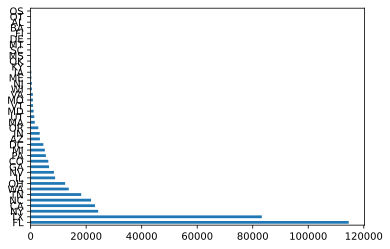

In [ ]:
data.state.value_counts().plot.barh()

# stories

In [ ]:
data.stories.value_counts()

1.0                                  67454
2.0                                  55283
1                                    23086
2                                    18146
3.0                                  11275
                                     ...  
Manufactured Home, Non-Site Built        1
Bedroom - Split Plan                     1
78                                       1
One, Two, Multi/Split                    1
65.0                                     1
Name: stories, Length: 348, dtype: int64

# mls-id

In [ ]:
data['mls-id'].value_counts()

No MLS#      3
No           3
1498550      2
39888954     2
608063       2
            ..
1020314      1
A10762436    1
1592770      1
14201834     1
F10202858    1
Name: mls-id, Length: 24907, dtype: int64

# PrivatePool

In [ ]:
data.PrivatePool.value_counts()

yes    28793
Yes    11518
Name: PrivatePool, dtype: int64

# MlsId

In [ ]:
data.MlsId.value_counts()

NO MLS                     24
No MLS #                   16
 A, Houston, TX 77008      13
 12A, Orlando, FL 32833    11
 B, Houston, TX 77008       9
                           ..
19092240                    1
RX-10563061                 1
218080001                   1
14154778                    1
10374233                    1
Name: MlsId, Length: 232944, dtype: int64